<a href="https://colab.research.google.com/github/GRT27/DeepDNN/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [ ]:
#Loading the Data
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

Now we are code Autoencoder , which is a nneural network which has the ability to  copy of its inputs.

x----->H------->r
x = original  input
H = laten representation
r = output



They are of Four Type
1. Vanilla autoencoders
2. Multilayer autoencoder
3. Convolutional autoencoder
4. Regularized autoencoder

  



In [ ]:
#Vanialla Autoencoder
# simple Netowrk with input , dense layer and decoder output
input_size = 784
hidden_size = 64
output_size = 784

In [ ]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0445 - val_loss: 0.0222
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0172 - val_loss: 0.0129
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0108 - val_loss: 0.0086
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0077 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0062 - val_loss: 0.0055


313/313 [==============================] - 1s 1ms/step


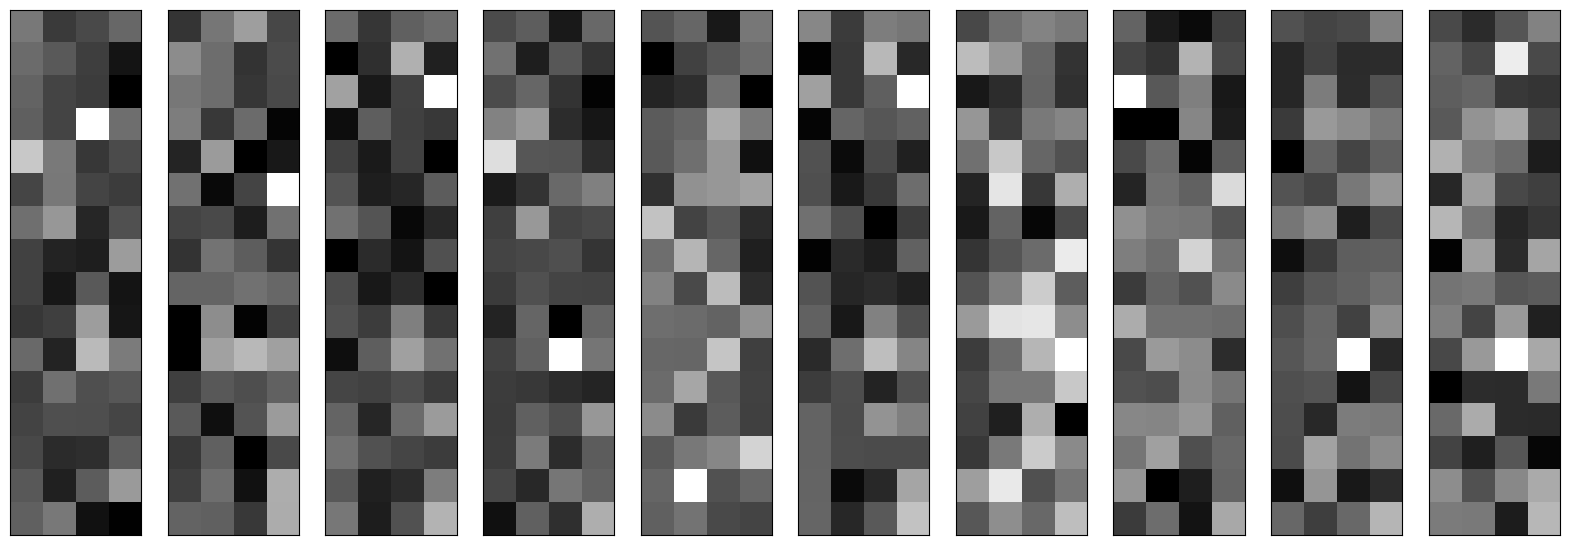

In [ ]:
#Visualizing  The input inside encoder

conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


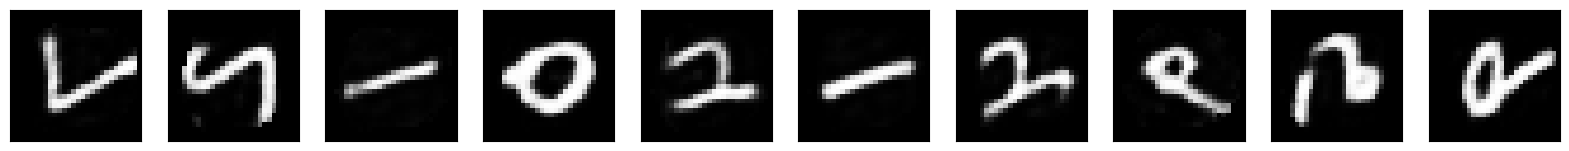

In [ ]:
#Visualizing test data
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

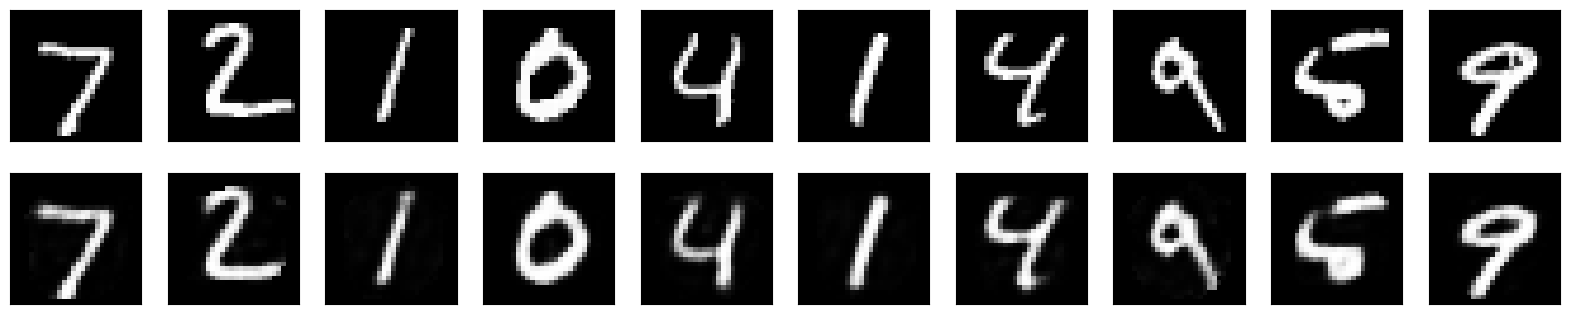

In [ ]:
#Visiualize The original  output by output by plotting
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


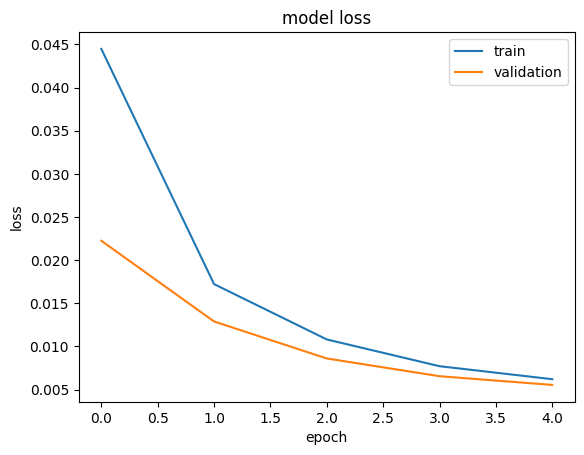

In [ ]:
#Plot The losses
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#Multilayer Autoencoder


In [ ]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Trianing The netowrk
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0406 - val_loss: 0.0184
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0152 - val_loss: 0.0126
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0089 - val_loss: 0.0082


313/313 [==============================] - 1s 2ms/step


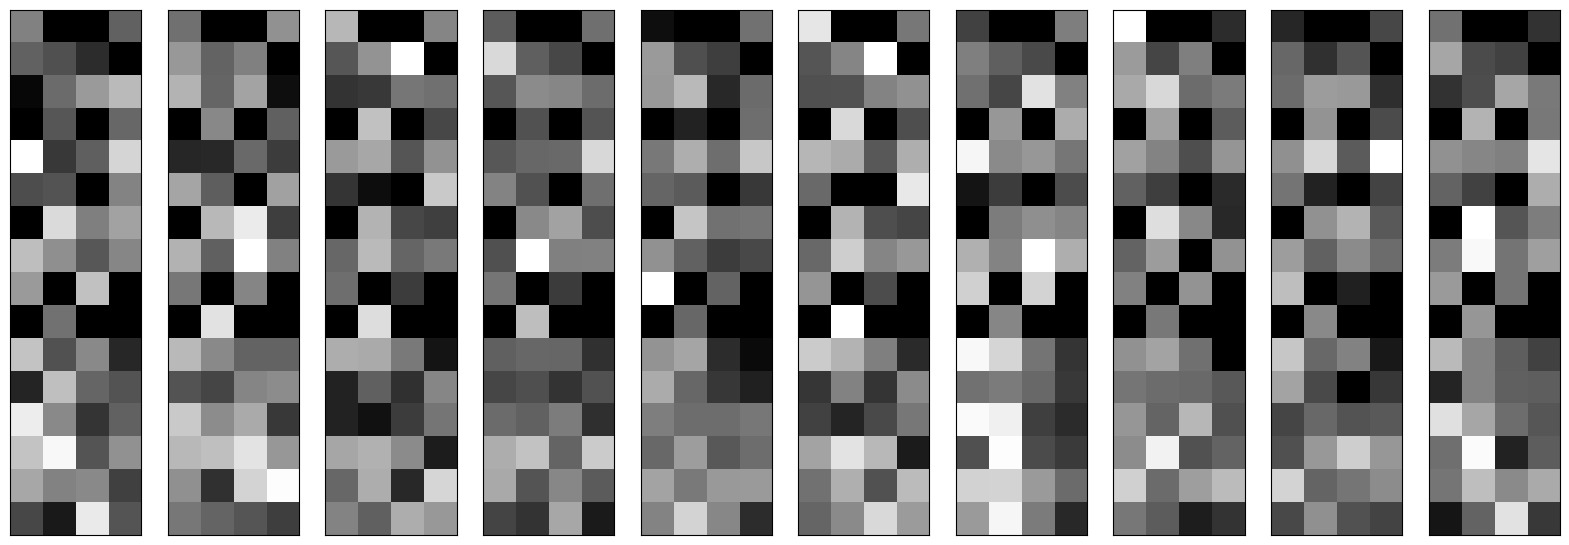

In [ ]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


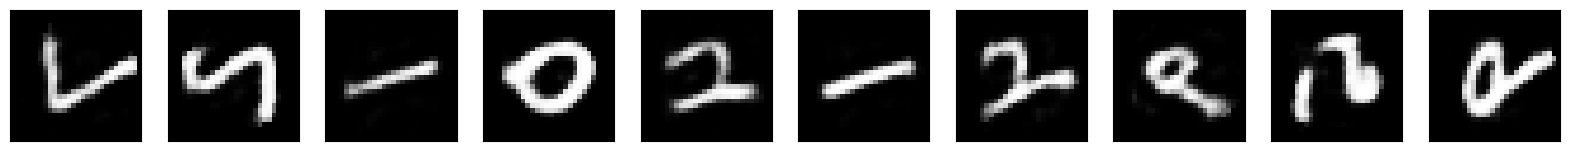

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

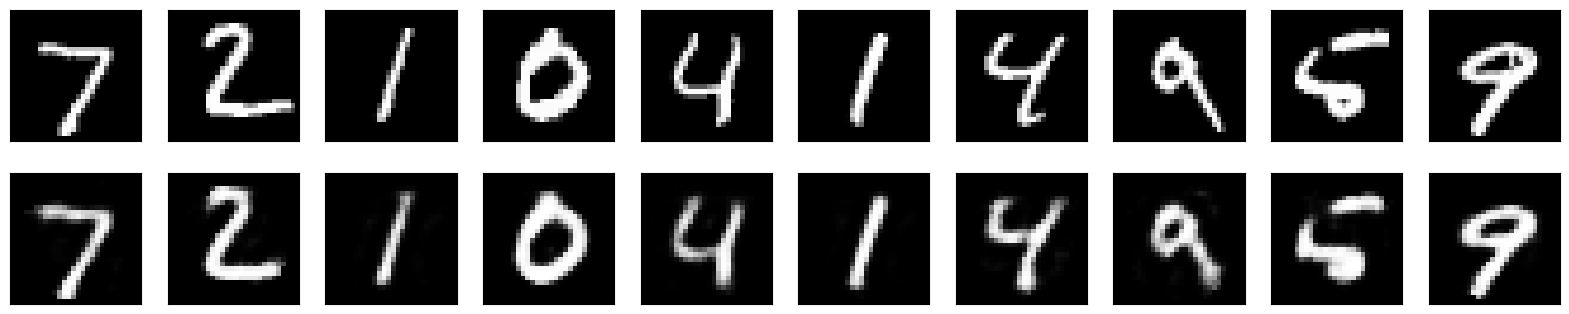

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


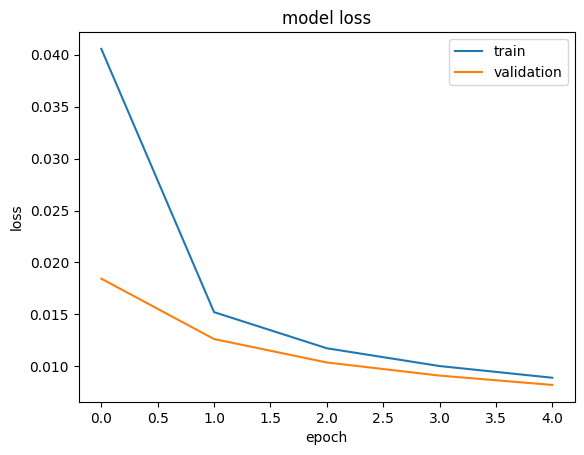

In [ ]:
#plot the loss
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#Convolutional Autoencoder

In [ ]:
nb_classes =  10

(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [ ]:
from keras.backend import conv1d
#Create The network
x = Input(shape=(28,28,1))

#Encoder

conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

#Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [ ]:
#Training The Conv Model

epochs = 3
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Epoch 1/3
469/469 [==============================] - 86s 180ms/step - loss: 0.7016 - val_loss: 0.6982
Epoch 2/3
469/469 [==============================] - 82s 174ms/step - loss: 0.6946 - val_loss: 0.6904
Epoch 3/3
469/469 [==============================] - 94s 201ms/step - loss: 0.6846 - val_loss: 0.6770


313/313 [==============================] - 3s 10ms/step


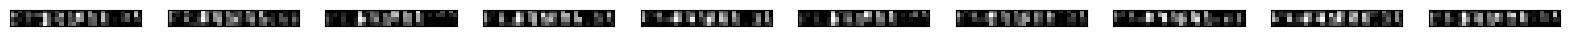

In [ ]:
# X input convo layer  representation  in the model
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    encoded_img_reshaped = np.reshape(encoded_imgs[i], (encoded_imgs[i].shape[0], -1))
    plt.imshow(encoded_img_reshaped, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


313/313 [==============================] - 5s 15ms/step


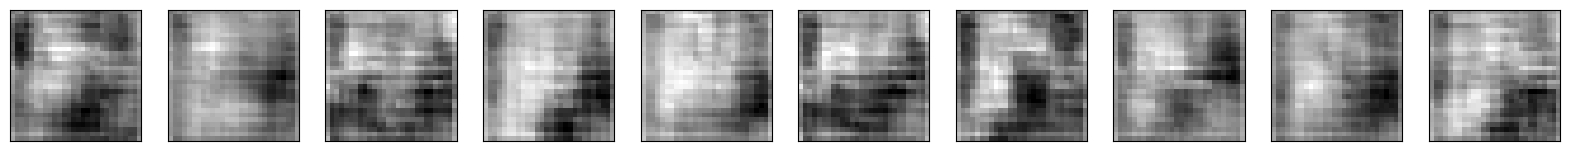

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 6s 18ms/step


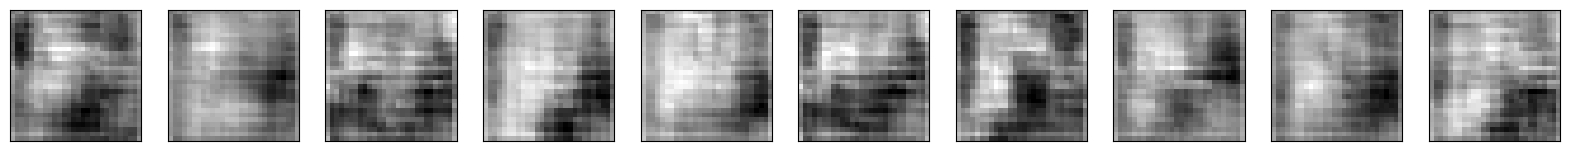

In [ ]:
encoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(28, 28).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

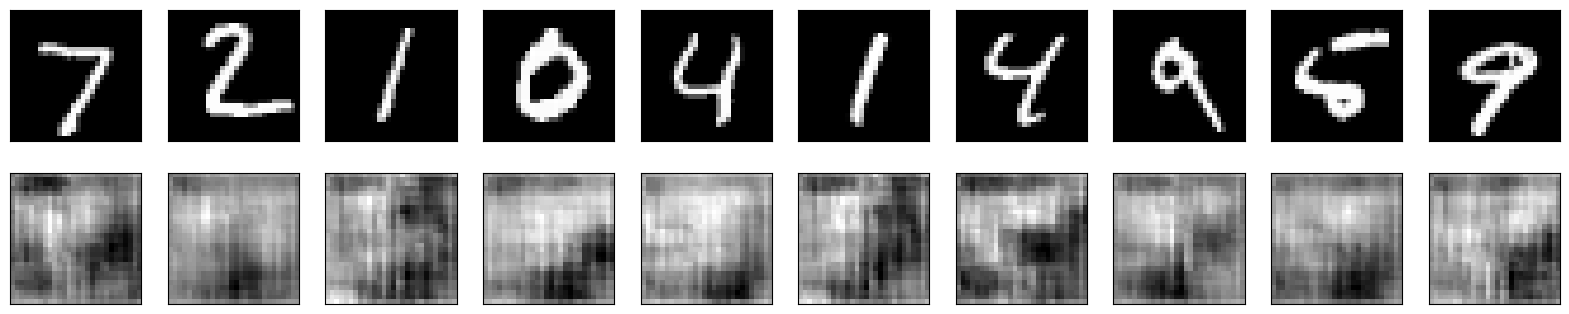

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


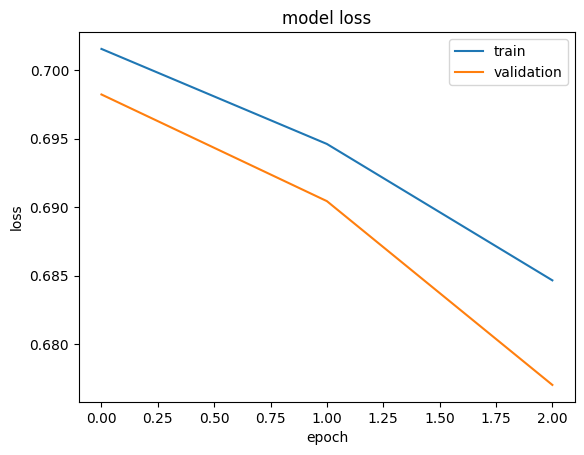

In [ ]:
#Plot  the  losses
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Regularized Autoencoders  : autoencoders which are regularized to prevent from overcompleting  and  undercompleting ,  such l1 & l2  Normalization , dropout etc
Two types of regularization are described :


*   Sparse autoencoder
*   Denoising autoencoder





In [ ]:
input_size = 784
hidden_size = 32
output_size = 784



X_train = np.reshape(X_train, (X_train.shape[0], 784))
X_test = np.reshape(X_test, (X_test.shape[0], 784))

Sparse encoder : type neural network which learns data representation by compressing the input data form by **sparsity enforcement** in the encoded representation  


*goal is to have most of the encoded values close to zero while only a few values are activated or non-zero*

*Sparsity: Sparse encoders aim to produce encoded representations that have a small number of non-zero values compared to the total number of values. This encourages the network to focus on important features and disregard irrelevant or redundant information.*

## Compression: Sparse encoders can be used for data compression by reducing the dimensionality of high-dimensional input data. By representing data in a sparse manner, the encoder can capture the most important information while discarding less relevant details.

Feature extraction: Sparse encoders are effective at extracting meaningful features from input data. By enforcing sparsity, the network learns to identify and emphasize the most distinctive and informative features, which can be useful for tasks such as pattern recognition or image classification.

Interpretability: Sparse encoders provide more interpretable representations compared to dense encoders. The sparsity constraint encourages the encoder to learn a sparse code that consists of a few activated features, making it easier to understand and interpret the encoded data.


In [ ]:
print(input_size)
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

epochs = 15
batch_size = 128
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

784
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0586 - val_loss: 0.0356
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0312 - val_loss: 0.0271
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0249 - val_loss: 0.0224
Epoch 4/15
469/

313/313 [==============================] - 1s 2ms/step


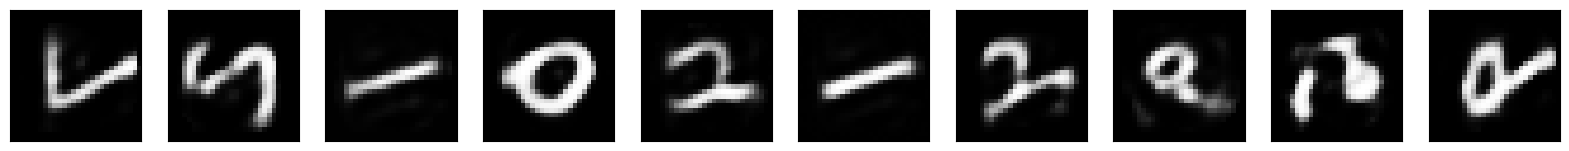

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#Visiualizing Decoder

313/313 [==============================] - 1s 2ms/step


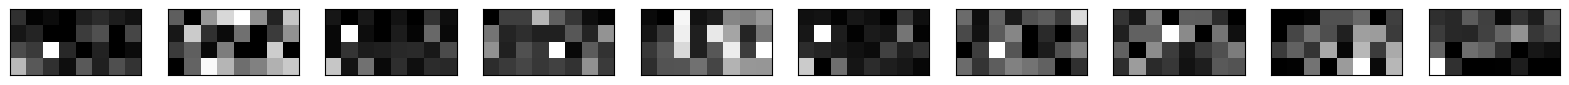

In [ ]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(8, 4).T)  # Reshape to match hidden layer size
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


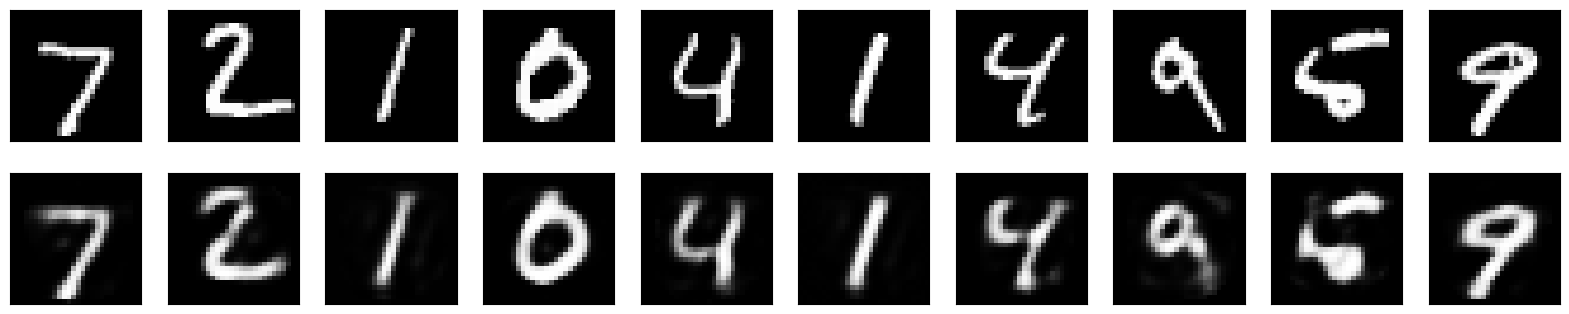

In [ ]:
#plot
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


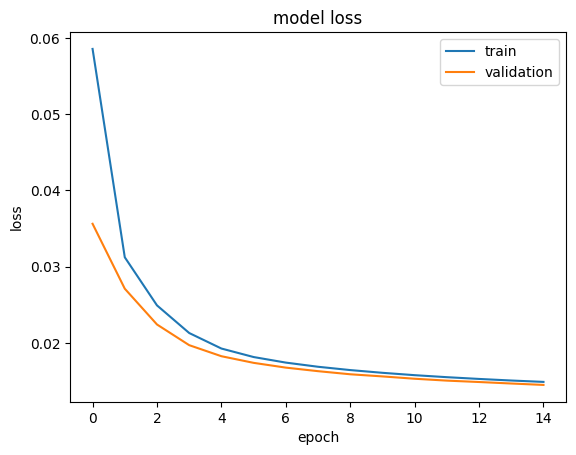

In [ ]:
#Plot The Losses
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Denoising Autoencoder

**Purpose**: Denoising autoencoders are designed to reconstruct clean input data from corrupted or noisy input data. They aim to learn a robust representation of the underlying clean data by training the autoencoder to remove the noise or corruption.

**Corrupted Input:** Denoising autoencoders take a corrupted version of the input data as input and learn to generate a clean version of the original data as output. The corruption can be introduced through various methods, such as adding random noise, masking random pixels, or applying other forms of data distortion.

**Reconstruction Objective: **The training objective of a denoising autoencoder is typically to minimize the reconstruction error between the clean output and the original uncorrupted input. By learning to reconstruct the original data despite the introduced corruption, the autoencoder is forced to capture the essential features and patterns of the data.

**Bottleneck Representation**: Denoising autoencoders typically have a bottleneck layer that acts as a compressed representation of the input data. This bottleneck layer forces the autoencoder to learn a concise and informative representation of the clean data, helping to filter out the noise or corruption during the reconstruction process.

**Generalization**: Denoising autoencoders can learn to generalize well to unseen or noisy data by learning robust features and patterns. They learn to extract the underlying structure of the data, enabling them to generate clean outputs even when presented with new instances of corrupted input.

**Regularization Effect**: Denoising autoencoders can also have a regularization effect, as the network learns to filter out noise and focus on important features. This can help prevent overfitting and improve the generalization performance of the model.


In [ ]:
(X_train, _) ,(x_test,_) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1)
x_test = x_test.reshape(X_test.shape[0],28,28,1)

x_train = X_train.astype("float32")/255
x_test = x_test.astype("float32")/255


# Size of input data
train_size = x_train.shape
test_size = x_test.shape

print("Size of Training Data:", train_size)
print("Size of Test Data:", test_size)

# Type of input data
train_type = x_train.dtype
test_type = x_test.dtype

print("Type of Training Data:", train_type)
print("Type of Test Data:", test_type)

Size of Training Data: (60000, 28, 28, 1)
Size of Test Data: (10000, 28, 28, 1)
Type of Training Data: float32
Type of Test Data: float32


In [ ]:
#Create Noisy Data

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0 ,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0 ,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)


# Size of noisy data
train_noisy_size = x_train_noisy.shape
test_noisy_size = x_test_noisy.shape

print("Size of Noisy Training Data:", train_noisy_size)
print("Size of Noisy Test Data:", test_noisy_size)

# Type of noisy data
train_noisy_type = x_train_noisy.dtype
test_noisy_type = x_test_noisy.dtype

print("Type of Noisy Training Data:", train_noisy_type)
print("Type of Noisy Test Data:", test_noisy_type)

Size of Noisy Training Data: (60000, 28, 28, 1)
Size of Noisy Test Data: (10000, 28, 28, 1)
Type of Noisy Training Data: float64
Type of Noisy Test Data: float64


In [ ]:

x = Input(shape=(28,28,1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)

#Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)


autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 32)          9248

In [ ]:

epochs = 3
batch_size = 128

history = autoencoder.fit(x_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_noisy, x_test))

Epoch 1/3
469/469 [==============================] - 164s 345ms/step - loss: -17547296768.0000 - val_loss: 575658393600.0000
Epoch 2/3
469/469 [==============================] - 162s 346ms/step - loss: -1353276609505794465099415552.0000 - val_loss: 39783119878019501791379456.0000
Epoch 3/3
469/469 [==============================] - 159s 340ms/step - loss: -3661044720931020745906061312.0000 - val_loss: 74923507867335562503389184.0000


In [ ]:
# X input convo layer representation in the model
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    encoded_img_reshaped = np.reshape(encoded_imgs[i], (encoded_imgs[i].shape[0], -1))
    plt.imshow(encoded_img_reshaped, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


313/313 [==============================] - 7s 21ms/step


In [ ]:
conv_encoder = Model(x, h)
decoded_imgs = conv_encoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    encoded_img_reshaped = np.reshape(encoded_imgs[i], (encoded_imgs[i].shape[0], -1))
    plt.imshow(encoded_img_reshaped, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


313/313 [==============================] - 4s 12ms/step


313/313 [==============================] - 10s 30ms/step


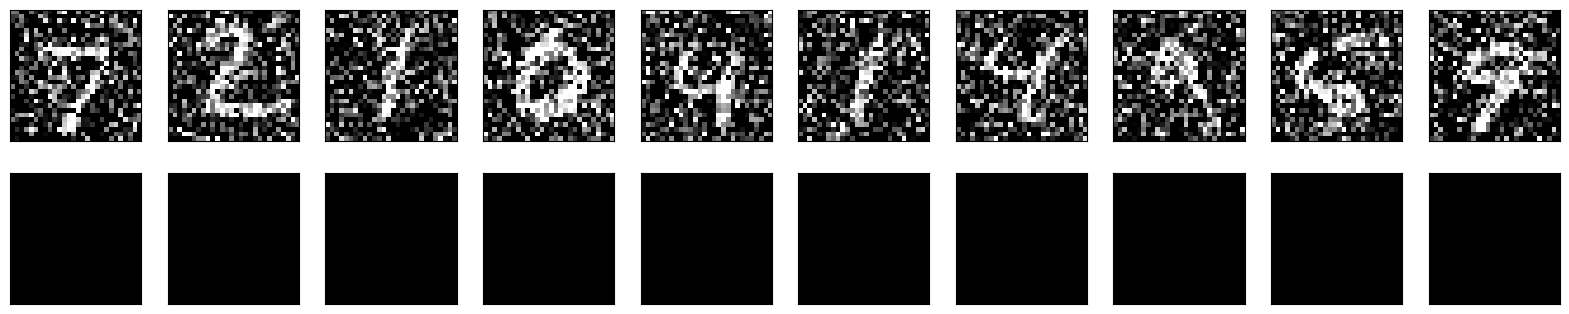

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


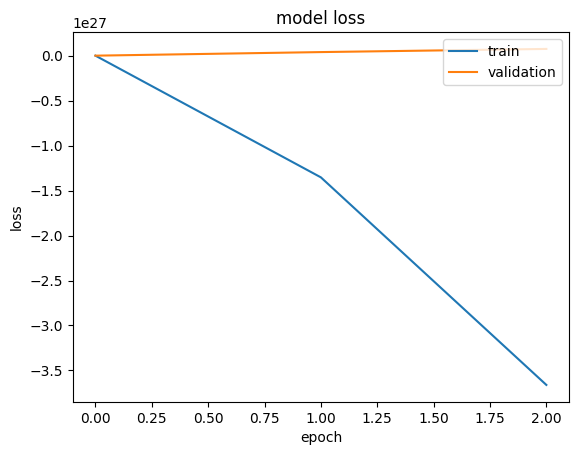

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()